# Improving results using LSTM
Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to recall past data in memory.

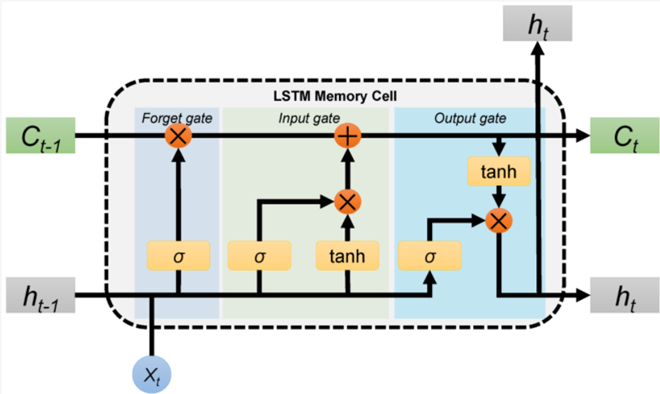

In [10]:
!pip install tensorflow-gpu

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
tf.__version__

'2.4.1'

In [13]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [14]:
X_train[0][:5]

[1, 14, 22, 16, 43]

In [16]:
X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen=100)

In [ ]:
X_train.shape

In [17]:
vocab_size = 20000
embed_size = 128

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 57s 281ms/step - loss: 0.5408 - accuracy: 0.7043 - val_loss: 0.3610 - val_accuracy: 0.8452
Epoch 2/5
196/196 [==============================] - 56s 284ms/step - loss: 0.2347 - accuracy: 0.9128 - val_loss: 0.3649 - val_accuracy: 0.8474
Epoch 3/5
196/196 [==============================] - 56s 285ms/step - loss: 0.1404 - accuracy: 0.9524 - val_loss: 0.4083 - val_accuracy: 0.8397
Epoch 4/5
196/196 [==============================] - 57s 292ms/step - loss: 0.0873 - accuracy: 0.9728 - val_loss: 0.5123 - val_accuracy: 0.8323
Epoch 5/5
196/196 [==============================] - 63s 320ms/step - loss: 0.0588 - accuracy: 0.9809 - val_loss: 0.6844 - val_accuracy: 0.8257


In [22]:
history.history

{'accuracy': [0.7931600213050842,
  0.9107999801635742,
  0.9464399814605713,
  0.9678400158882141,
  0.975600004196167],
 'loss': [0.42941805720329285,
  0.23181888461112976,
  0.1506361961364746,
  0.09491845965385437,
  0.07097476720809937],
 'val_accuracy': [0.8452000021934509,
  0.8474000096321106,
  0.839680016040802,
  0.832319974899292,
  0.8256800174713135],
 'val_loss': [0.36100441217422485,
  0.36485421657562256,
  0.40828031301498413,
  0.5123321413993835,
  0.6844302415847778]}

In [23]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

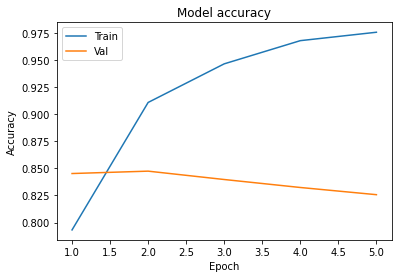

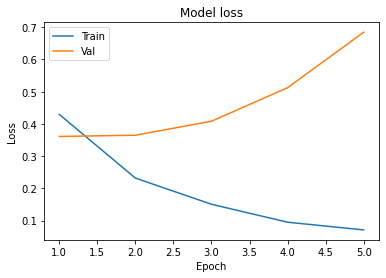

In [24]:
plot_learningCurve(history, 5)